## Import

In [847]:
import gymnasium as gym
import matplotlib.pyplot as plt
from tqdm import tqdm

## Create testing env

In [848]:
env = gym.make('CarRacing-v3', continuous = False)

# Run Experiment

In [849]:
import train_off
import numpy as np

In [850]:
env = gym.make('CarRacing-v3', continuous=False, render_mode="rgb_array")
env = gym.wrappers.FlattenObservation(env)
state, _ = env.reset()
print(f"State type: {type(state)}")
print(f"State shape: {state.shape}")
print(f"State min/max: {state.min()}, {state.max()}")

State type: <class 'numpy.ndarray'>
State shape: (27648,)
State min/max: 0, 228


In [851]:
env = gym.make("Blackjack-v1", sab=False)

In [852]:
env.reset()
act = env.action_space.sample()
print(act)
env.step(act)

0


((19, 6, 0), 1.0, True, False, {})

In [853]:
print(range(5))
for i in range(5):
    print(i)

range(0, 5)
0
1
2
3
4


# Off-policy Training

In [854]:
import importlib
importlib.reload(train_off)

<module 'train_off' from 'c:\\Users\\josep\\Code\\School\\RL\\Assignments\\hw3\\train_off.py'>

In [855]:
"""Train the agent on the Car Racing environment"""
env = gym.make("Blackjack-v1", sab=False)
# env = gym.make("CarRacing-v3", continuous=False, render_mode = "human")
# env = gym.wrappers.FlattenObservation(env)

In [856]:
ep_value_sophisticated = []
ep_value_simplified = []

In [857]:
num_episodes = 100_000

In [858]:
agent = train_off.NStepOffPolicySarsa(env=env, epsilon=0.1, method="sophisticated", n_steps=10)
agent.run_episode()

0.25775859045185096

In [859]:
agent = train_off.NStepOffPolicySarsa(env=env, epsilon=0.1, method="sophisticated", n_steps=10)

for episode in tqdm(range(0, num_episodes)):
    sophisticated_values = agent.run_episode()
    ep_value_sophisticated.append(sophisticated_values)

100%|██████████| 100000/100000 [00:17<00:00, 5691.23it/s]


In [860]:
off_agent = train_off.NStepOffPolicySarsa(env=env, method="simplified", epsilon=0.1, n_steps=10)
ep_reward_simplified = []
for episode in tqdm(range(0, num_episodes)):
    simplified_values = off_agent.run_episode()
    ep_value_simplified.append(simplified_values)
    ep_reward_simplified.append(sum(off_agent.R))

100%|██████████| 100000/100000 [00:18<00:00, 5409.58it/s]


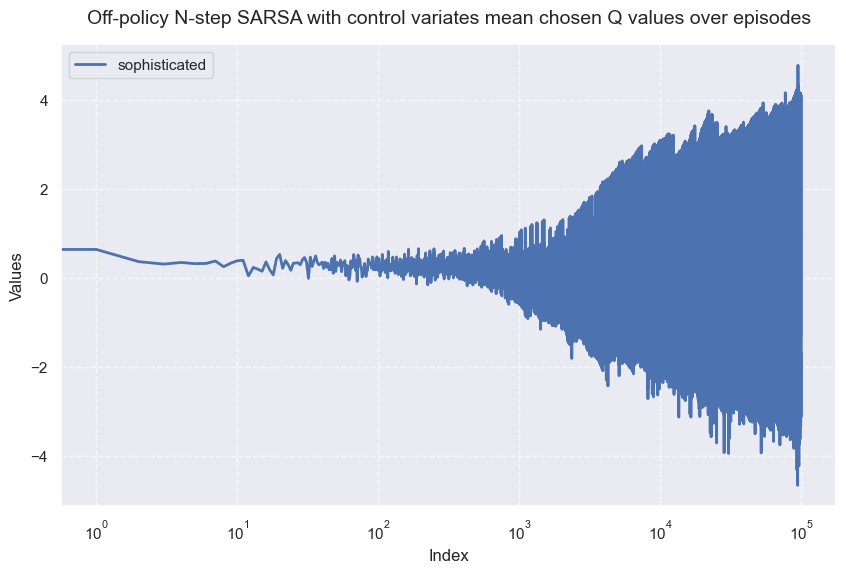

In [861]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(ep_value_sophisticated, 'b-', label='sophisticated', linewidth=2)

# Add labels and title
plt.title('Off-policy N-step SARSA with control variates mean chosen Q values over episodes', fontsize=14, pad=15)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xscale('log')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()

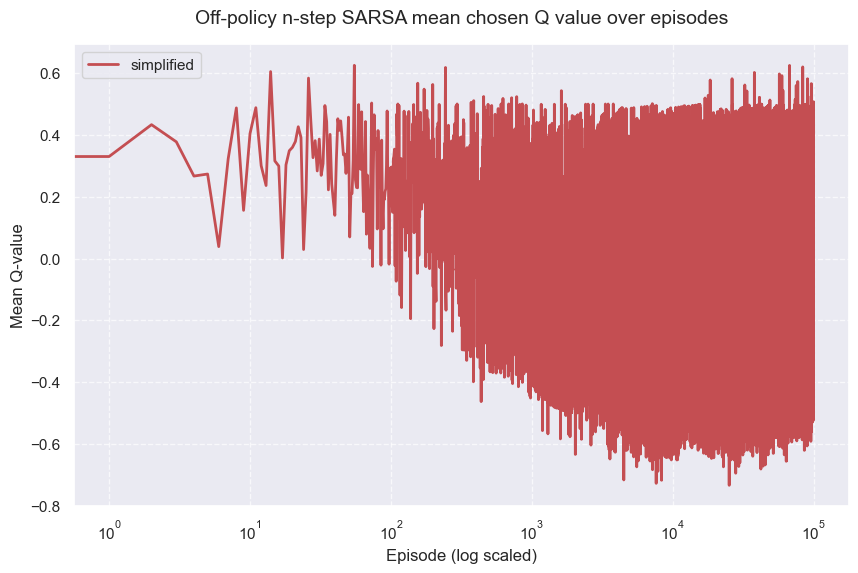

In [862]:

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(ep_value_simplified, 'r-', label='simplified', linewidth=2)

# Add labels and title
plt.title('Off-policy n-step SARSA mean chosen Q value over episodes', fontsize=14, pad=15)
plt.xlabel('Episode (log scaled)', fontsize=12)
plt.ylabel('Mean Q-value', fontsize=12)
plt.xscale('log')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()

# On-policy Training

In [863]:
import train_on
importlib.reload(train_on)

<module 'train_on' from 'c:\\Users\\josep\\Code\\School\\RL\\Assignments\\hw3\\train_on.py'>

In [864]:
num_episodes = 100_000

In [865]:
ep_value = []

In [866]:
on_agent = train_on.NStepSarsa(env=env, method="simplified", epsilon=0.1, n_steps=10)
ep_reward_on = []

for episode in tqdm(range(0, num_episodes)):
    simplified_values = on_agent.run_episode()
    ep_value.append(simplified_values)
    ep_reward_on.append(sum(on_agent.R))

100%|██████████| 100000/100000 [00:17<00:00, 5608.25it/s]


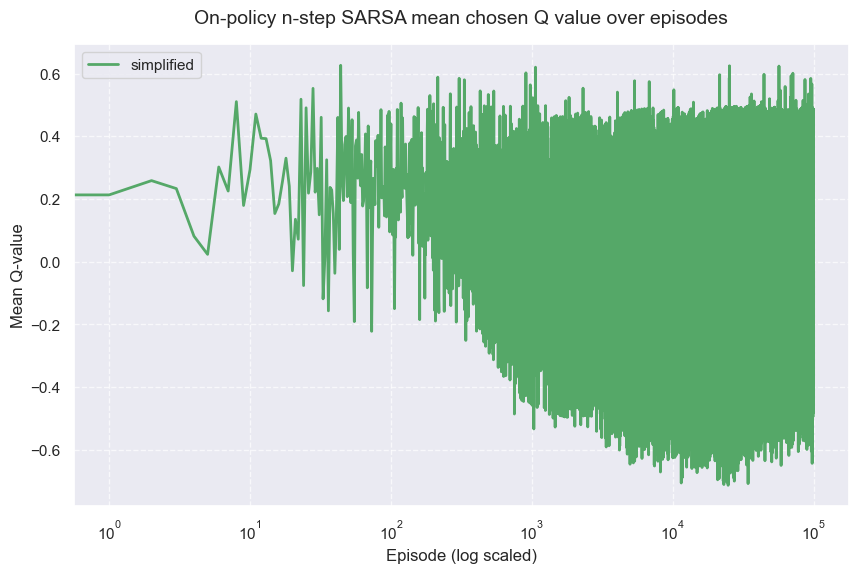

In [867]:

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(ep_value, 'g-', label='simplified', linewidth=2)

# Add labels and title
plt.title('On-policy n-step SARSA mean chosen Q value over episodes', fontsize=14, pad=15)
plt.xlabel('Episode (log scaled)', fontsize=12)
plt.ylabel('Mean Q-value', fontsize=12)
plt.xscale('log')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()

# Method Comparison

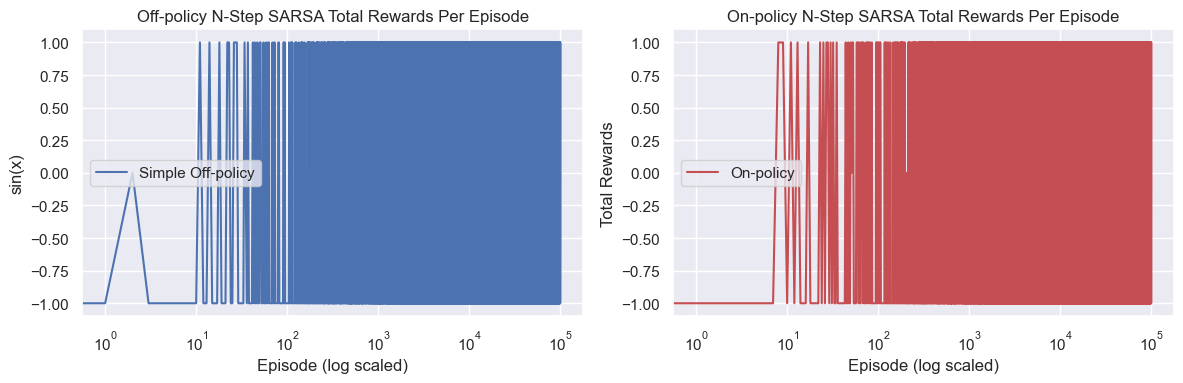

In [868]:

plt.figure(figsize=(12, 4))

# First plot
plt.subplot(121)  # 1 row, 2 columns, first plot
plt.plot(ep_reward_simplified, 'b-', label='Simple Off-policy')
plt.title('Off-policy N-Step SARSA Total Rewards Per Episode')
plt.xlabel('Episode (log scaled)')
plt.ylabel('sin(x)')
plt.xscale('log')
plt.grid(True)
plt.legend()

# Second plot
plt.subplot(122)  # 1 row, 2 columns, second plot
plt.plot(ep_reward_on, 'r-', label='On-policy')
plt.title('On-policy N-Step SARSA Total Rewards Per Episode')
plt.xlabel('Episode (log scaled)')
plt.ylabel('Total Rewards')
plt.xscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Create DataFrame with training times
data = {
    'Method': [
        'On-policy n-step SARSA (simplified)',
        'Off-policy n-step SARSA (simplified)',
        'Off-policy n-step SARSA (sophisticated)'
    ],
    'Training Time (seconds)': [17.8, 18.5, 17.5]  # Empty placeholders for times
}

df = pd.DataFrame(data)

# Display the table
print("\nTraining Time Comparison:")
print(df.to_string(index=False))



Training Time Comparison:
                                 Method  Training Time (seconds)
    On-policy n-step SARSA (simplified)                     17.5
   Off-policy n-step SARSA (simplified)                     18.5
Off-policy n-step SARSA (sophisticated)                     17.8
